# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 

The dataset contains 20 columns:
* **budget**: the average cost to produce the movie
* **genres**: Drama, Comedy, Romance, Adventure, Action, Fantasy, Science Fiction, Thriller, Horror
* **homepage**: the default or front page of the movie's site
* **id**: the unique ID for every movie
* **keywords**: the terms that captures the essence of the topic of the movie
* **original_language**: the language in which the movie was made
* **original_title**: the title of the movie before translation
* **overview**: a short description of the movie
* **popularity**: the number of total votes
* **production_companies**: the production house of the movie
* **production_countries**: the country in which it was produced
* **release_date**: the date on which it was released
* **revenue**: the worldwide revenue generated by the movie
* **runtime**: duration of the movie
* **spoken_languages**: the languages in which the movie is translated
* **status**: Released, Rumored, or Post Production
* **tagline**: a catchphrase
* **title**: the title of the movie
* **vote_average**: from 0 to 10
* **vote_count**: the count of votes


### Questions for Analysis
1. Which are the top 5 movies in terms of revenue? 
2. Which type of movies is the most well rated? 
3. Is there a dominant company in movies production? 
4. Do shorter movies have tendency to be more well rated?
5. Are high budgeted movies more popular?

In [774]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#% matplotlib inline

In [775]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

In [776]:
# dataset link: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata
df= pd.read_csv('tmdb_5000_movies.csv')

In [777]:
df.shape

(4803, 20)

The dataset has 20 columns and 4803 rows.

In [778]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [779]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               


### Data Cleaning

There are some columns that we won't need during our investigation and that won't help us answering our questions such as '*homepage*', '*keywords*', '*id*', '*overview*', and '*tagline*'. We can drop them.

In [780]:
# drop the useless columns
df.drop(['homepage', 'keywords', 'id', 'overview', 'tagline'], axis = 1, inplace = True)

In [781]:
df.head(1)

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800


In [782]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   original_language     4803 non-null   object 
 3   original_title        4803 non-null   object 
 4   popularity            4803 non-null   float64
 5   production_companies  4803 non-null   object 
 6   production_countries  4803 non-null   object 
 7   release_date          4802 non-null   object 
 8   revenue               4803 non-null   int64  
 9   runtime               4801 non-null   float64
 10  spoken_languages      4803 non-null   object 
 11  status                4803 non-null   object 
 12  title                 4803 non-null   object 
 13  vote_average          4803 non-null   float64
 14  vote_count            4803 non-null   int64  
dtypes: float64(3), int64(

We have a missing value in *release_date* and 2 missing values in *runtime*. We can simply search for the movies' names on the internet and fill the missing values.

In [783]:
df[df.runtime.isnull()]

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",it,Chiamatemi Francesco - Il Papa della gente,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",en,"To Be Frank, Sinatra at 100",0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,"To Be Frank, Sinatra at 100",0.0,0


By a quick google research we can find that **Chiamatemi Francesco - Il Papa della gente**'s runtime is 1h53m = 113m
And **To Be Frank, Sinatra at 100**'s runtime is 1h 21m = 81m

In [784]:
# fill the runtime missing values
df.loc[df['title']=='Chiamatemi Francesco - Il Papa della gente','runtime']=130.0

df.loc[df['title']=='To Be Frank, Sinatra at 100','runtime']=81.0

In [785]:
# check for the runtime values
df.loc[df.index[2656]].runtime, df.loc[df.index[4140]].runtime

(130.0, 81.0)

In [786]:
df[df.release_date.isnull()]

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
4553,0,[],en,America Is Still the Place,0.0,[],[],NaN,0,0.0,[],Released,America Is Still the Place,0.0,0


The row containing the *release_date* missing value is useless. We can simply drop it

In [787]:
# drop the row having release_time missing value
df.dropna(inplace=True)

In [788]:
# check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4802
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4802 non-null   int64  
 1   genres                4802 non-null   object 
 2   original_language     4802 non-null   object 
 3   original_title        4802 non-null   object 
 4   popularity            4802 non-null   float64
 5   production_companies  4802 non-null   object 
 6   production_countries  4802 non-null   object 
 7   release_date          4802 non-null   object 
 8   revenue               4802 non-null   int64  
 9   runtime               4802 non-null   float64
 10  spoken_languages      4802 non-null   object 
 11  status                4802 non-null   object 
 12  title                 4802 non-null   object 
 13  vote_average          4802 non-null   float64
 14  vote_count            4802 non-null   int64  
dtypes: float64(3), int64(

In [789]:
# chage release-date type from object to date
df["release_date"] = pd.to_datetime(df["release_date"])

In [790]:
# check for release_date type
df.dtypes

budget                           int64
genres                          object
original_language               object
original_title                  object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
title                           object
vote_average                   float64
vote_count                       int64
dtype: object

In [791]:
# check for duplicated rows
df.duplicated().value_counts()

False    4802
dtype: int64

In [792]:
df.head(1)

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800


From the *genres*, *production_companies*, *production_countries*, and *spoken_languages* features, we need to extract the 4 most important values associated with that movie. Right now, our data is present in the form of "stringified" lists , we need to convert it into a safe and usable structure

In [793]:
# literal_eval method is one of the helper functions that helps traverse an abstract syntax tree. 
from ast import literal_eval

In [794]:
features = ['genres', 'production_companies', 'production_countries','spoken_languages']
for item in features:
    df[item] = df[item].apply(literal_eval)

In [795]:
# Returns the list top 4 item or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
#Check if more than 4 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 4:
            names = names[:4]
        return names

#Return empty list in case of missing/malformed data
        return []

In [796]:
features = ['genres', 'production_companies', 'production_countries','spoken_languages']
for item in features:
    df[item] = df[item].apply(get_list)

In [797]:
df.head()

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",en,Avatar,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Released,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",en,Pirates of the Caribbean: At World's End,139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",en,Spectre,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[Français, English, Español, Italiano]",Released,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",en,The Dark Knight Rises,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,[English],Released,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",en,John Carter,43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,[English],Released,John Carter,6.1,2124


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Which are the top 5 movies in terms of revenue?)

Text(0, 0.5, 'Revenue')

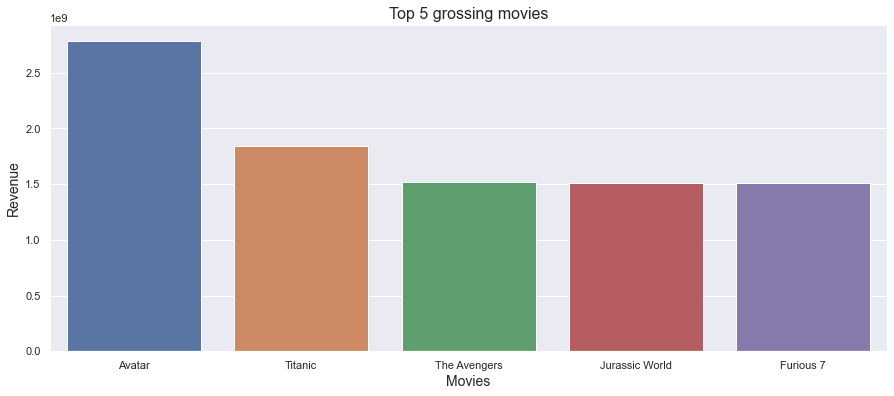

In [798]:
df1 = df.loc[:, ['revenue', 'title']].sort_values(by='revenue', ascending=False).head(5)
plt.figure(figsize=(15, 6))
splot1= sns.barplot(x='title', y='revenue', data=df1)
plt.title('Top 5 grossing movies',size=16)
plt.xlabel('Movies',size=14)
plt.ylabel('Revenue',size=14)

The Top 5 grossing movies are respectively: 
1. Avatar
2. Titanic
3. The Avengers
4. Jurassic World
5. Furious 7

### Research Question 2  (Which types of movies are the best rated?)

In [799]:
df2 = df.loc[:, ['vote_average', 'genres']]
df2.head()

,vote_average,genres
0,7.2,"[Action, Adventure, Fantasy, Science Fiction]"
1,6.9,"[Adventure, Fantasy, Action]"
2,6.3,"[Action, Adventure, Crime]"
3,7.6,"[Action, Crime, Drama, Thriller]"
4,6.1,"[Action, Adventure, Science Fiction]"


In [800]:
# Convert the list elements of genres to a row while replacing the index values and returning the DataFrame exploded lists.
df2 = df2.explode('genres')

In [801]:
# determine the number of missing values in genres column
len(df2[df2.genres.isnull()].genres)

27

We have 27 missing values in genres column

In [802]:
# select the indexes of the rows with missing values in genres columns
indices = df2[df2['genres'].isnull()].index.tolist()

In [803]:
# extract the titles of the movies with missing genres
df.loc[indices,['genres','title']].head()

,genres,title
3971,[],Iguana
3992,[],Sardaarji
4068,[],Sharkskin
4105,[],"The Book of Mormon Movie, Volume 1: The Journey"
4118,[],Hum To Mohabbat Karega


After knowing the names of the movies and with a simple google research, we can find the appropriate genres of the missing values and then we can fill the genres column

In [804]:
# fill out missing values
df.loc[indices,['genres']] = np.array(['Adventure',('Fantasy','Romance'),('Drama','Mystery'),('Drama','Adventure'),'Romance',('Thriller','Action'),'Horror',('Comedy','Drama'),('Drama','Comedy'),'Drama','Drama',('Drama','Thriller'),'Documentary',('Family','Drama'),'Action',('Comedy','Drama'),'Documentary',('Horror','Comedy'),'Drama','Thriller',('Action','Mystery'),'Documentary','Documentary','Documentary','Drama',('Documentary','War'),'Romance'],dtype=object,)

In [805]:
# Convert the list elements of genres to a row while replacing the index values and returning the DataFrame exploded lists.
df = df.explode('genres')

In [806]:
# check if there are still a missing value
len(df[df.genres.isnull()].genres)

0

In [807]:
# calculate the average rating per genre
df3 = df.groupby('genres').mean().sort_values(by='vote_average', ascending=False)['vote_average']
df3.head()

genres
History      6.720918
War          6.676515
Music        6.372159
Drama        6.366898
Animation    6.349138
Name: vote_average, dtype: float64

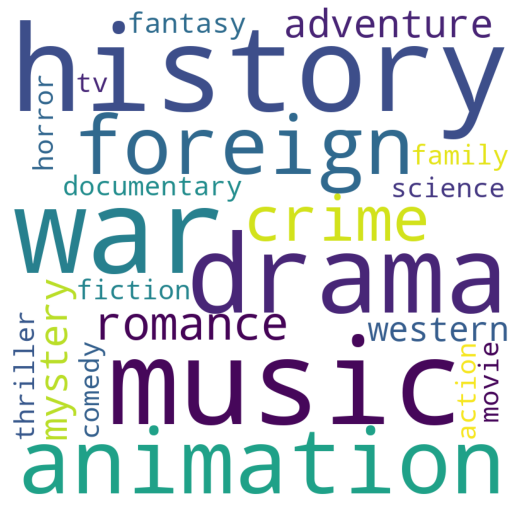

In [808]:
# create a wordcloud to find out the best rated movie genre
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df3.index:
    
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

From the wordcloud it is understood that **History**, **War**, **Music**, **Drama**, and **Animation** are best rated.

### Research Question 3  (Is there a dominant company in movies production?)

In [809]:
# Convert the list elements of production_companies to a row while replacing the index values and returning the DataFrame exploded lists.
df = df.explode('production_companies')
df.head()

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,Action,en,Avatar,150.437577,Ingenious Film Partners,"[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Released,Avatar,7.2,11800
0,237000000,Action,en,Avatar,150.437577,Twentieth Century Fox Film Corporation,"[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Released,Avatar,7.2,11800
0,237000000,Action,en,Avatar,150.437577,Dune Entertainment,"[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Released,Avatar,7.2,11800
0,237000000,Action,en,Avatar,150.437577,Lightstorm Entertainment,"[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Released,Avatar,7.2,11800
0,237000000,Adventure,en,Avatar,150.437577,Ingenious Film Partners,"[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Released,Avatar,7.2,11800


In [810]:
# Convert the list elements of production_companies to a row while replacing the index values and returning the DataFrame exploded lists.
df4 = df['production_companies'].value_counts()
df4.head()

Warner Bros.                              815
Universal Pictures                        797
Paramount Pictures                        748
Twentieth Century Fox Film Corporation    619
Columbia Pictures                         518
Name: production_companies, dtype: int64

In [811]:
T = len(df)
t = df4.head().sum()
T,t

(30147, 3497)

In [812]:
df5 = (df4.head() / T) *t
df5

Warner Bros.                              94.538594
Universal Pictures                        92.450625
Paramount Pictures                        86.766710
Twentieth Century Fox Film Corporation    71.802932
Columbia Pictures                         60.087107
Name: production_companies, dtype: float64

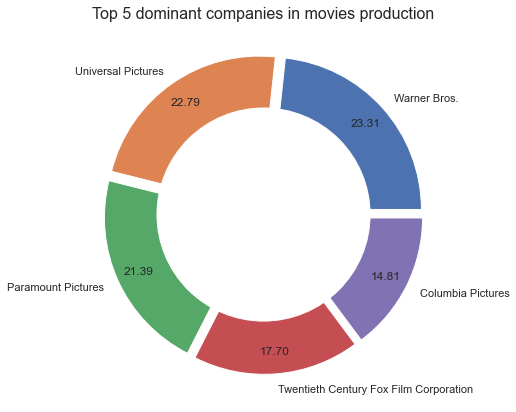

In [813]:
# plot
plt.figure(figsize=(10, 7))
plt.pie(df5, labels=df5.index,
       autopct='%.2f',
       pctdistance=0.85, 
       explode=(0.05, 0.05, 0.05, 0.05, 0.05))
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Top 5 dominant companies in movies production', size=16)
plt.show()

Top 5 dominant companies
 1. Warner Bros
 2. Universal Pictures
 3. Paramount Pictures
 4. Twentieth Century Fox Film Corporation
 5. Columbia Pictures

### Research Question 4  (Do shorter movies have tendency to be more well rated?)

In [814]:
# calculate runtime mean
mean1 = df.runtime.mean()

In [815]:
# calculate average runtime of short movies
short = df[df.runtime < mean1].vote_average.mean()

In [816]:
# calculate aveage runtime of long movies
long = df[df.runtime >= mean1].vote_average.mean()

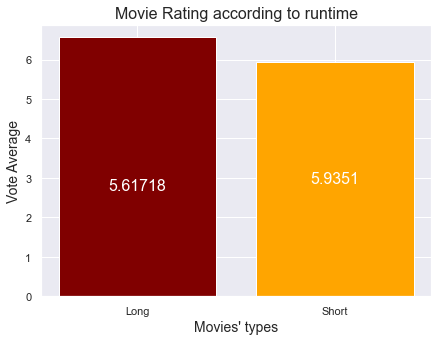

In [826]:
# plot
plt.figure(figsize=(7,5))
plt.bar((1,2),(long, short), tick_label=('Long','Short'), color=('maroon','orange'))
plt.title('Movie Rating according to runtime',size=16)
plt.xlabel("Movies' types",size=14)
plt.ylabel('Vote Average',size=14)
plt.bar_label(splot3.containers[0],size=16, label_type='center', color='white');

Long Movies are more likely to have better vote ratings.

### Research Question 5  (Are high budgeted movies more popular?)

Let us correlate budget and popularity and see if there exist any correlation.

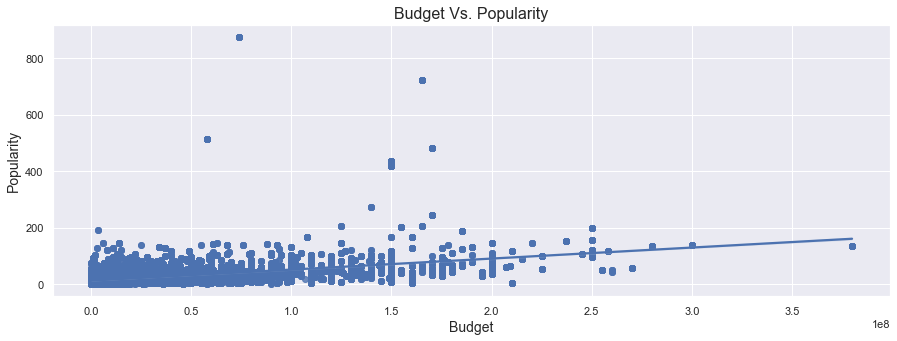

In [818]:
sns.set_theme(color_codes=True)
sns.set(rc = {'figure.figsize':(15,5)})
sns.figsize=(15,15)
p = sns.regplot(data=df, x="budget", y="popularity")
p.set_title('Budget Vs. Popularity', fontsize = 16)
p.set_xlabel("Budget", fontsize = 14)
p.set_ylabel("Popularity", fontsize = 14);

It seems that there exists a very week positive correlation between budget and popularity

<a id='conclusions'></a>
## Conclusions

**Results**: Our data suggests that:

* The Top 5 grossing movies are respectively:

1. Avatar
2. Titanic
3. The Avengers
4. Jurassic World
5. Furious 7

* There is not big difference between the distribution of popularity between movies which had low and high budgets.

* Movies in **History**, **War**, **Music**, **Drama**, and **Animation** genres are more likely to have good vote ratings.

* Long Movies are more likely to have better vote ratings.

**Limitations**: There are a couple of limitations in our data:

* We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed

* The statistics used here are descriptive statistics, not inferential, meaning that we did not create any hypotheses or controlled experiments or inferences with our data.

**References**: I would like to mention excellent references that I learned from how to 
* Deal with the **json** columns in the dataset:
https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system/notebook
* Create a meaningful **wordcloud**:
https://www.kaggle.com/code/gsdeepakkumar/movie-mania-exploring-the-movie-database

In [819]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295